# CIFAR 10 Image Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import tensorflow.keras
from tensorflow.keras import datasets,layers,models

## Load Data

In [15]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [16]:
print(f'Train Shape\nX:{X_train.shape}   Y:{y_train.shape}')
print(f'Test Shape\nX:{X_test.shape}   Y:{y_test.shape}')

Train Shape
X:(50000, 32, 32, 3)   Y:(50000, 1)
Test Shape
X:(10000, 32, 32, 3)   Y:(10000, 1)


In [17]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train=y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
y_test=y_test.reshape(-1,)
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

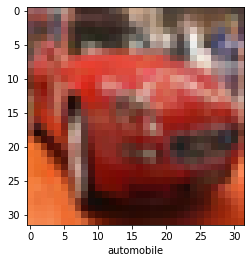

In [24]:
plot_sample(X_train,y_train,5)

## Normalizing the train data

In [25]:
X_train=X_train/255.0
X_test=X_test/255.0

## Modelling

In [27]:
input_shape=X_train[1].shape
input_shape

(32, 32, 3)

In [28]:
ann=models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(5000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(500,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [29]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 5000)              15365000  
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              15003000  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 33,874,510
Trainable params: 33,874,510
Non-trainable params: 0
____________________________________________

In [32]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 184s 117ms/step - loss: 1.8142 - accuracy: 0.3490
Epoch 2/10
 651/1563 [===========>..................] - ETA: 1:46 - loss: 1.6299 - accuracy: 0.4217